## Importing Packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models

/Users/justingong/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Sorting Folders into Train/Test Split and Respective Buckets

In [13]:
np.unique([int(x.split("_")[0]) for x in os.listdir("UTKFace_test")])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  95,  96,  99, 100, 101, 103, 105, 110, 111, 115, 116])

(array([3413., 2631., 9063., 3141., 2688., 1400.,  854.,  446.,   54.,
          18.]),
 array([  1. ,  12.5,  24. ,  35.5,  47. ,  58.5,  70. ,  81.5,  93. ,
        104.5, 116. ]),
 <BarContainer object of 10 artists>)

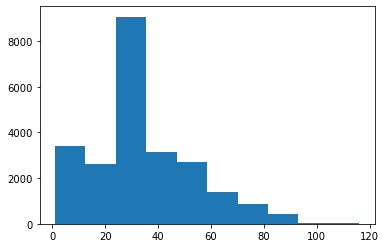

In [14]:
plt.hist([int(x.split("_")[0]) for x in os.listdir("UTKFace_test")])

Ensure that UTKFace folder is a folder in the same directory as .ipynb file with all images in the folder. If images are already properly sorted into testing/training directories, skip to next section.

In [29]:
path = "./UTKFace2"
files = os.listdir(path)

In [30]:
train_files, test_files = train_test_split(files, test_size = 0.2)

In [31]:
train_path = os.path.join(path, 'train')
test_path = os.path.join(path, 'test')
if not os.path.exists(train_path):
    os.makedirs(train_path)
if not os.path.exists(test_path):
    os.makedirs(test_path)

In [32]:
# move the training files to the training folder
for file in train_files:
    src_path = os.path.join(path, file)
    dst_path = os.path.join(train_path, file)
    shutil.move(src_path, dst_path)

# move the testing files to the testing folder
for file in test_files:
    src_path = os.path.join(path, file)
    dst_path = os.path.join(test_path, file)
    shutil.move(src_path, dst_path)

In [40]:
#Gather all files in the training/testing folder 
train_path = "./UTKFace2/train"
train_files = os.listdir(train_path)

test_path = "./UTKFace2/test"
test_files = os.listdir(test_path)

In [129]:
def get_range_string(number):
    lower_bound = (number // 10) * 10
    upper_bound = lower_bound + 9
    return f"{lower_bound}-{upper_bound}"

get_range_string(14)

'10-19'

In [47]:
#go through the files and create folders for each classification and put the image into the correct classification folder
for filename in train_files:
    age = int(filename.split('_')[0])
    desired_path = os.path.join(train_path, get_range_string(age))
    
    if not os.path.exists(desired_path):
        os.makedirs(desired_path)
        
    src_path = os.path.join(train_path, filename)
    dst_path = os.path.join(desired_path, filename)
    shutil.move(src_path, dst_path)

In [48]:
#go through the files and create folders for each classification and put the image into the correct classification folder
for filename in test_files:
    age = int(filename.split('_')[0])
    desired_path = os.path.join(test_path, get_range_string(age))
    
    if not os.path.exists(desired_path):
        os.makedirs(desired_path)
        
    src_path = os.path.join(test_path, filename)
    dst_path = os.path.join(desired_path, filename)
    shutil.move(src_path, dst_path)

# NOTE: Only keep overlapping folders from the train/test folders after this! 

If above has already been ran once, start here:

## Loading in Images using ImageDataGenerator

In [2]:
train_path = "./UTKFace2/train"
test_path = "./UTKFace2/test"

In [3]:
checkpoints_directory = os.path.join(train_path, '.ipynb_checkpoints')
if os.path.exists(checkpoints_directory):
    os.rmdir(checkpoints_directory)

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size = (200, 200),
                                                   batch_size = 32,
                                                   class_mode = 'categorical',
                                                   color_mode = 'rgb',
                                                   subset = 'training')
test_generator = test_datagen.flow_from_directory(test_path,
                                                 target_size = (200, 200),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                  color_mode = 'rgb',
                                                 shuffle = False)

Found 18953 images belonging to 11 classes.
Found 4742 images belonging to 11 classes.


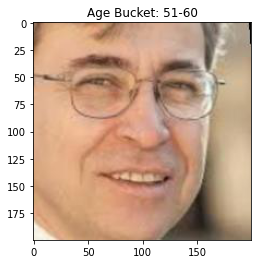

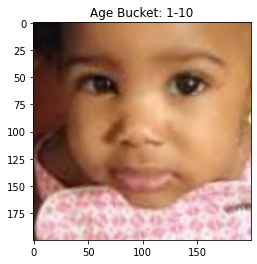

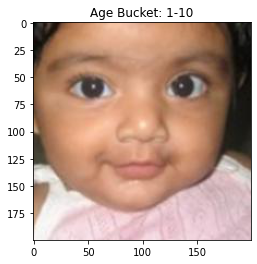

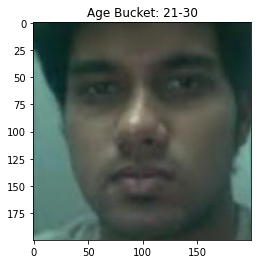

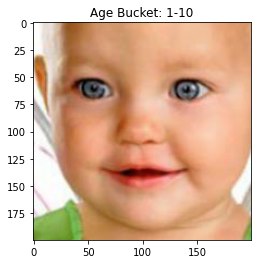

In [70]:
images, labels = next(train_generator)

# Display the first 5 images and their categories
for i in range(5):
    category_index = labels[i].argmax()
    category_name = list(train_generator.class_indices.keys())[labels[i].argmax()]
    
    plt.imshow(images[i])
    plt.title('Age Bucket: ' + category_name)
    plt.show()

## Constructing Neural Network and Training Model

In [277]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(11, activation='softmax'))

In [278]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
             optimizer = "adam",
             metrics = ["accuracy"])

In [279]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100,
                              epochs=20,
                             validation_data = test_generator,
                             validation_steps = 50)

<ipython-input-279-d803175f3753>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/20
100/100 [==============================] - 139s 1s/step - loss: 1.9840 - accuracy: 0.3078 - val_loss: 1.8752 - val_accuracy: 0.3812
Epoch 2/20
100/100 [==============================] - 126s 1s/step - loss: 1.8193 - accuracy: 0.3506 - val_loss: 1.4387 - val_accuracy: 0.6438
Epoch 3/20
100/100 [==============================] - 124s 1s/step - loss: 1.6161 - accuracy: 0.4219 - val_loss: 1.3403 - val_accuracy: 0.6637
Epoch 4/20
100/100 [==============================] - 118s 1s/step - loss: 1.5377 - accuracy: 0.4369 - val_loss: 1.1366 - val_accuracy: 0.6550
Epoch 5/20
100/100 [==============================] - 115s 1s/step - loss: 1.4969 - accuracy: 0.4466 - val_loss: 1.0074 - val_accuracy: 0.7094
Epoch 6/20
100/100 [==============================] - 132s 1s/step - loss: 1.4503 - accuracy: 0.4594 - val_loss: 1.0427 - val_accuracy: 0.7031
Epoch 7/20
100/100 [==============================] - 154s 2s/step - loss: 1.4112 - accuracy: 0.4669 - val_loss: 0.9782 - val_accuracy: 0.7169

In [280]:
model.save('age_cnn_model')

INFO:tensorflow:Assets written to: age_cnn_model/assets


INFO:tensorflow:Assets written to: age_cnn_model/assets


In [283]:
#model = keras.models.load_model('age_cnn_model')

## Comparing Predictions using Validation Set

In [62]:
import seaborn as sns

In [5]:
class_labels = list(test_generator.class_indices.keys())

In [7]:
test_generator.class_indices

{'1-10': 0,
 '101-110': 1,
 '11-20': 2,
 '21-30': 3,
 '31-40': 4,
 '41-50': 5,
 '51-60': 6,
 '61-70': 7,
 '71-80': 8,
 '81-90': 9,
 '91-100': 10}

In [37]:
unique_values, value_counts = np.unique(test_generator.classes, return_counts = True)

In [40]:
buckets_predictions = model.predict(test_generator)

149/149 [==============================] - 40s 263ms/step


In [43]:
buckets_predictions[0].argmax()

0

In [50]:
true_labels = test_generator.classes
predicted_labels = np.argmax(buckets_predictions, axis=1)

num_classes = len(test_generator.class_indices)
correct_per_class = np.zeros(num_classes)

for true_label, predicted_label in zip(true_labels, predicted_labels):
    if true_label == predicted_label:
        correct_per_class[true_label] += 1

In [53]:
correct_per_class / value_counts

array([0.84169279, 0.        , 0.13888889, 0.86068966, 0.20620843,
       0.24884793, 0.22222222, 0.30656934, 0.05844156, 0.23584906,
       0.08333333])

In [57]:
unique_values, value_counts = np.unique(predicted_labels, return_counts = True)

In [58]:
correct_per_class / value_counts

array([0.86057692, 0.        , 0.43478261, 0.54521625, 0.36758893,
       0.23529412, 0.32601881, 0.24633431, 0.23684211, 0.3968254 ,
       0.2       ])

In [88]:
accuracies = list(correct_per_class / value_counts)
accuracies.append(accuracies.pop(1))

Text(0, 0.5, 'Accuracy')

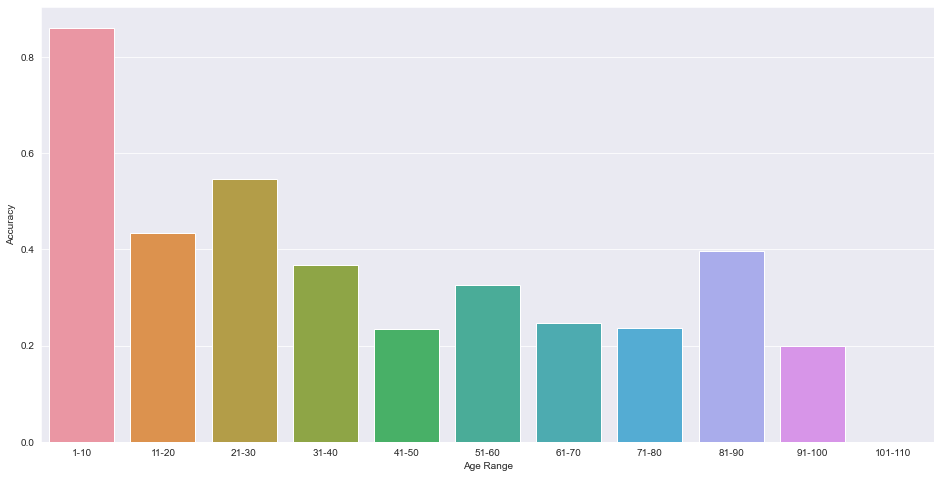

In [89]:
plt.figure(figsize = (16, 8))
sns.set_style("darkgrid")
custom_palette = ["#FF0000", "#00FF00", "#0000FF"]
sns.set_palette(custom_palette)
sns.barplot(x =["1-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100", "101-110"], y = accuracies)
plt.xlabel("Age Range")
plt.ylabel("Accuracy")

1/1 [==============================] - 1s 795ms/step


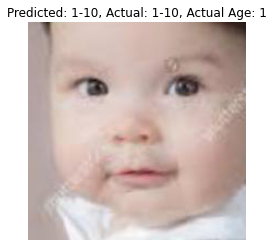

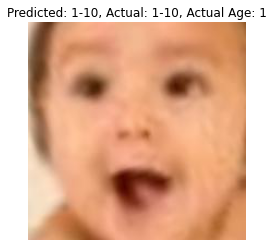

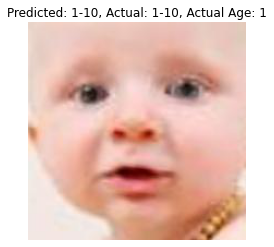

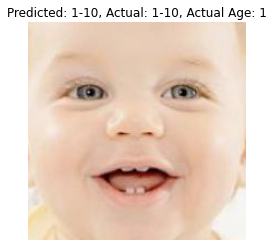

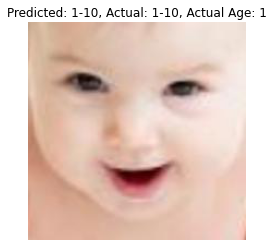

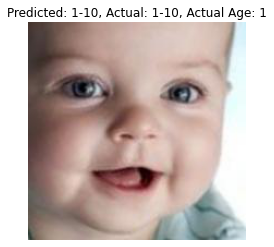

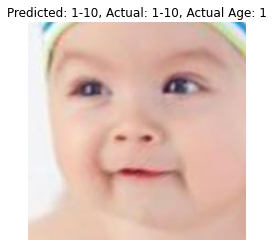

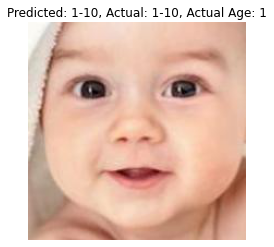

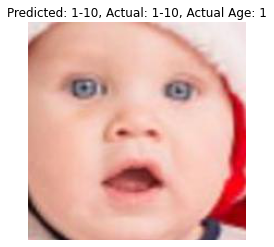

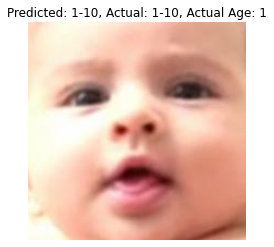

1/1 [==============================] - 0s 430ms/step


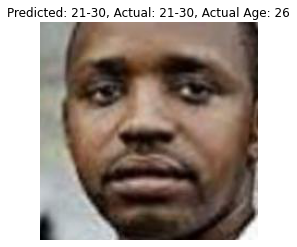

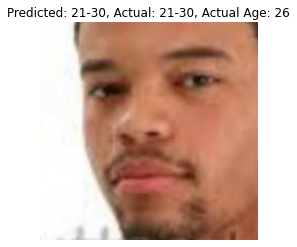

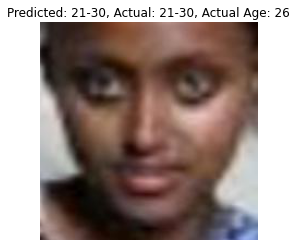

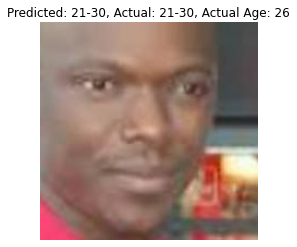

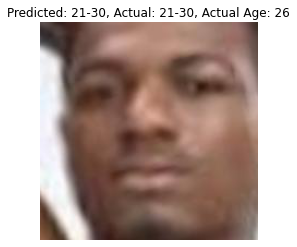

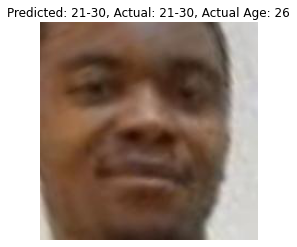

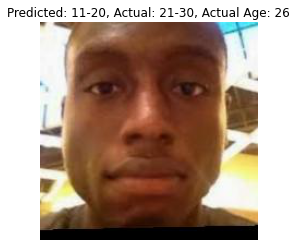

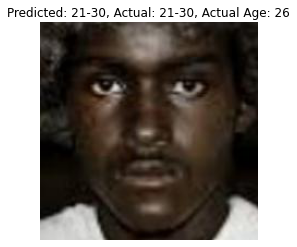

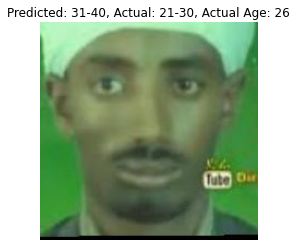

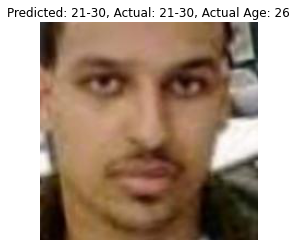

1/1 [==============================] - 0s 289ms/step


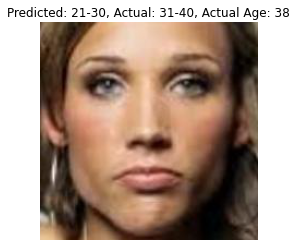

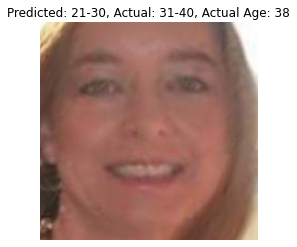

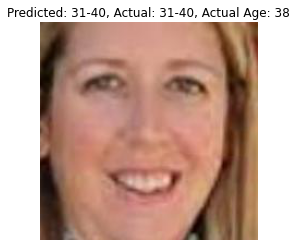

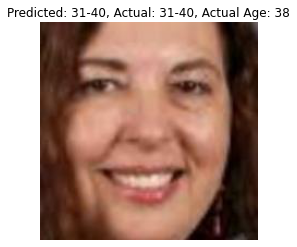

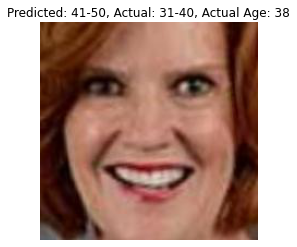

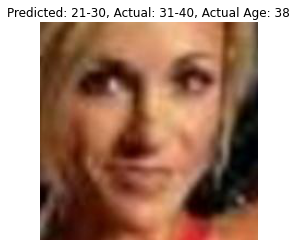

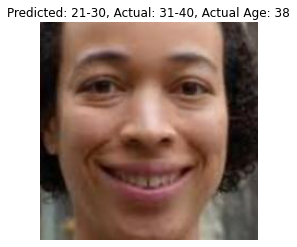

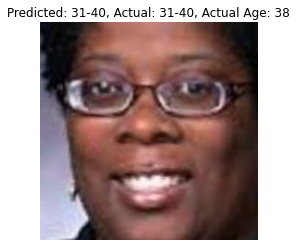

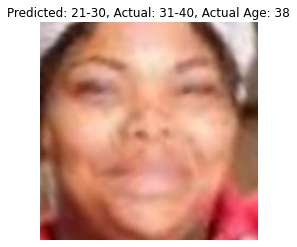

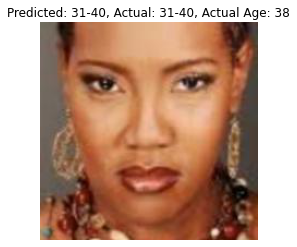

1/1 [==============================] - 0s 325ms/step


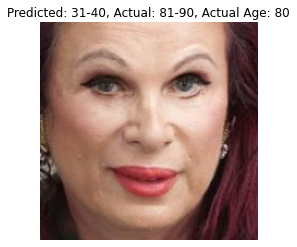

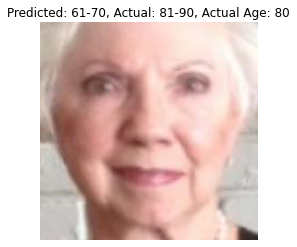

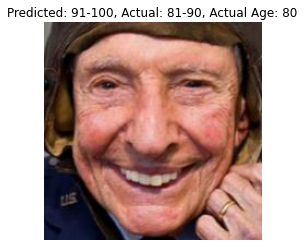

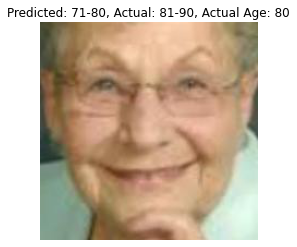

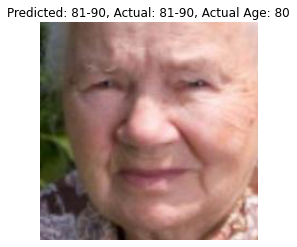

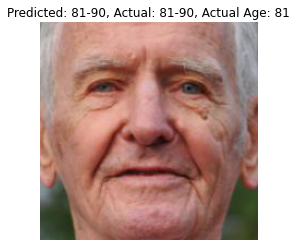

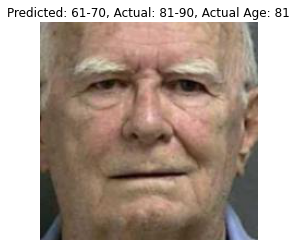

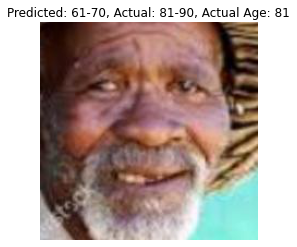

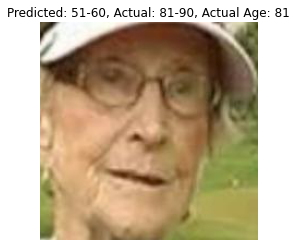

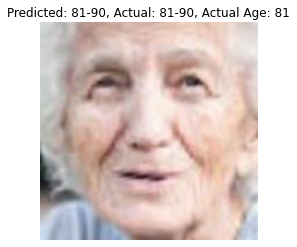

In [285]:
# Get the class labels and their corresponding indices
class_labels = list(test_generator.class_indices.keys())
class_indices = test_generator.class_indices

# Iterate over the test data generator
for i in [0,50,100,145]:
    # Get the batch of images and labels
    images, labels = test_generator[i]
    begin_idx = 32 * i 
    end_idx = begin_idx + 32
    filenames = test_generator.filenames[begin_idx:end_idx]
    predictions = model.predict(images)

    # Get the predicted class labels and true class labels
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(labels, axis=1)

    # Print the predictions with actual labels
    for j in range(10):
        predicted_class = class_labels[predicted_labels[j]]
        true_class = class_labels[true_labels[j]]
        true_age = filenames[j].split("/")[1].split("_")[0]

        # Plot the image
        plt.imshow(images[j])
        plt.title(f"Predicted: {predicted_class}, Actual: {true_class}, Actual Age: {true_age}")
        plt.axis('off')
        plt.show()

## Constructing XGBoost Regressor Model to Determine Specific Age

In [5]:
model = tf.keras.models.load_model('age_cnn_model')

In [6]:
#Constructing empty dataframe 
colnames = list(test_generator.class_indices.keys())
colnames.append("age")
colnames.append("filename")
df = pd.DataFrame(columns=colnames)

In [7]:
#Creating dataframe with probability values, age, and filenames
for i in range(len(test_generator)):
    # Get the batch of images and labels
    images, labels = test_generator[i]
    begin_idx = 32 * i 
    end_idx = begin_idx + 32
    filenames = test_generator.filenames[begin_idx:end_idx]
    predictions = model.predict(images)
    
    # Print the predictions with actual labels
    for j in range(len(predictions)):
        probabilities = predictions[j]
        true_age = filenames[j].split("/")[1].split("_")[0]
        probabilities = np.append(probabilities, true_age)
        probabilities = np.append(probabilities, filenames[j])
        append = pd.DataFrame(probabilities).transpose()
        append.columns = colnames
        df = df.append(append, ignore_index = True)

1/1 [==============================] - 0s 189ms/step


In [18]:
df.iloc[:, :12] = df.iloc[:, :12].astype(float)

In [19]:
df

1-10   101-110     11-20     21-30     31-40     41-50     51-60  \
0     0.987325  0.001391   0.00328  0.002194  0.000692  0.001451   0.00049   
1     0.913671   0.00039  0.007841  0.046311  0.010428  0.006139   0.00467   
2     0.989117  0.000354  0.004575  0.003074  0.000798    0.0005  0.000263   
3       0.9884  0.001376   0.00358  0.000316  0.000091  0.000138  0.000325   
4     0.994631  0.000321  0.000286  0.001188   0.00028  0.000235  0.000064   
...        ...       ...       ...       ...       ...       ...       ...   
4737  0.003639  0.009462  0.001795  0.004301   0.01244  0.075145  0.214275   
4738  0.000659  0.013121  0.000502  0.000248  0.001485  0.004727  0.019747   
4739  0.001338  0.001742  0.000245  0.010499  0.019906  0.019499  0.042469   
4740  0.009515  0.000958  0.011314  0.045298  0.082427  0.111534  0.124448   
4741  0.000461  0.001505  0.000104  0.000103  0.000771   0.00747   0.01109   

         61-70     71-80     81-90    91-100   age  \
0     0.001313  0.000773  0.000979  0.000112   1.0   
1     0.004624  0.002568   0.00204  0.001318   1.0   
2     0.001035  0.000108   0.00014  0.000036   1.0   
3     0.001727  0.001378  0.002391  0.000277   1.0   
4     0.000333  0.000255  0.002347  0.000061   1.0   
...        ...       ...       ...       ...   ...   
4737   0.21962  0.234732  0.166756  0.057836  95.0   
4738  0.054115   0.08273  0.327298  0.495368  95.0   
4739  0.318863  0.197377  0.273878  0.114186  96.0   
4740  0.261042   0.14392  0.135341  0.074203  96.0   
4741   0.09801  0.183071  0.453923  0.243493  99.0   

                                          filename  
0        1-10/1_0_0_20161219140627985.jpg.chip.jpg  
1        1-10/1_0_0_20161219154724341.jpg.chip.jpg  
2        1-10/1_0_0_20161219190621290.jpg.chip.jpg  
3        1-10/1_0_0_20161219192208688.jpg.chip.jpg  
4        1-10/1_0_0_20161219195753899.jpg.chip.jpg  
...                                            ...  
4737  91-100/95_1_0_20170120140026048.jpg.chip.jpg  
4738  91-100/95_1_0_20170120230149594.jpg.chip.jpg  
4739  91-100/96_1_0_20170110172637082.jpg.chip.jpg  
4740  91-100/96_1_3_20170110180250210.jpg.chip.jpg  
4741  91-100/99_1_2_20170117195405372.jpg.chip.jpg  

[4742 rows x 13 columns]

In [8]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

In [9]:
X = df.drop(["age", "filename"], axis = 1)
y = df["age"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [10]:
X_train = X_train.astype(float)
y_train = y_train.astype(float)

In [11]:
X_test = X_test.astype(float)
y_test = y_test.astype(float)

In [17]:
parameters = {'max_depth': [3, 5, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.25, 0.5],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.5, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
model2 = xgb.XGBRegressor()
xgb_model = RandomizedSearchCV(estimator = model2,
                              param_distributions = parameters,
                              scoring = "neg_mean_squared_error",
                              verbose = 1)
xgb_model.fit(X_train, y_train)
xgb_model.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'subsample': 0.8999999999999999,
 'n_estimators': 1000,
 'max_depth': 10,
 'learning_rate': 0.01,
 'colsample_bytree': 0.8999999999999999,
 'colsample_bylevel': 0.6}

In [12]:
xgbr = xgb.XGBRegressor(n_estimators = 1000,
                       subsample = 0.9,
                       max_depth = 10,
                       learning_rate = 0.01,
                       colsample_bytree = 0.9,
                       colsample_bylevel = 0.6)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.6, colsample_bynode=1, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

## Evaluating Model

In [13]:
from PIL import Image

In [14]:
age_predictions = xgbr.predict(X_test)

In [15]:
print(mean_absolute_error([int(x) for x in age_predictions], y_test))

7.224281150159745


In [16]:
print(mean_absolute_error(age_predictions, y_test))

7.244232690067718


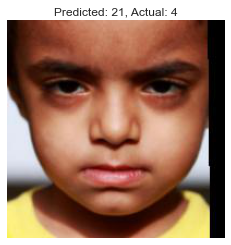

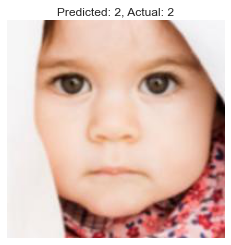

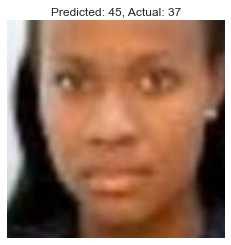

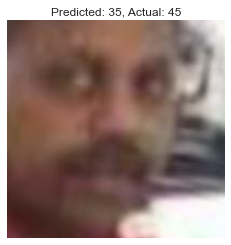

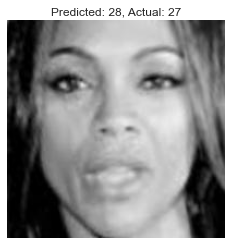

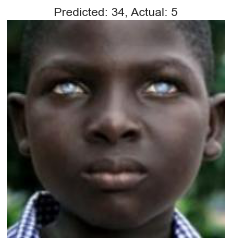

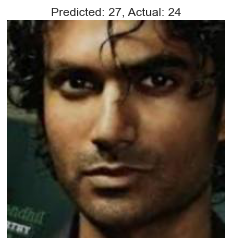

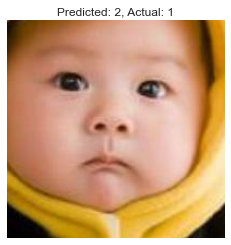

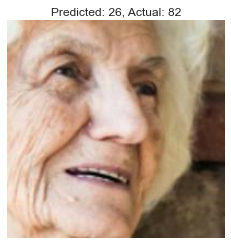

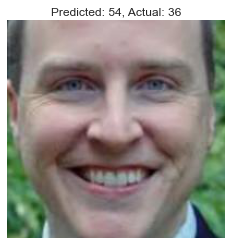

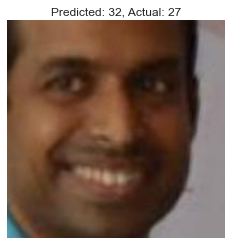

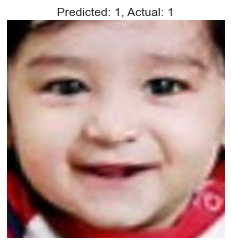

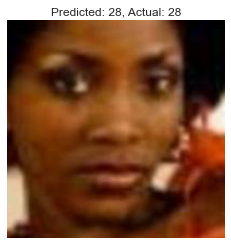

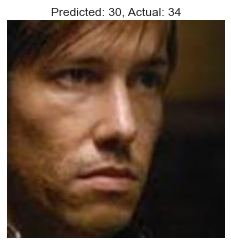

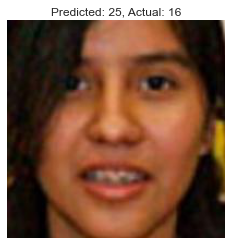

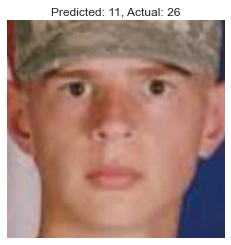

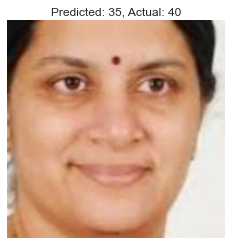

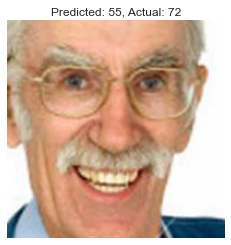

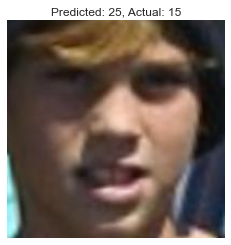

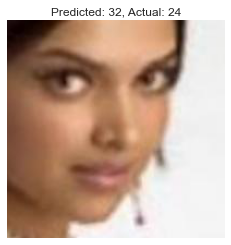

In [92]:
for x in range(60, 80):
    age_pred = int(age_predictions[x])
    real_age = int(y_test.iloc[x])
    image_path = f"UTKFace2/test/{df.iloc[y_test.index[x]]['filename']}"
    image = Image.open(image_path)
    
    plt.imshow(image)
    plt.title(f"Predicted: {age_pred}, Actual: {real_age}")
    plt.axis('off')        
    plt.show()

In [6]:
import pickle

In [25]:
filename = 'xgb_model.pkl'
pickle.dump(xgbr, open(filename, 'wb'))

In [8]:
with open('xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [11]:
xgbr = xgb.XGBRegressor()
xgbr._Booster = loaded_model

In [27]:
hairan_datagen = ImageDataGenerator(rescale=1./255)
hairan_generator = hairan_datagen.flow_from_directory("./hairan_liang",
                                                 target_size = (200, 200),
                                                 batch_size = 8,
                                                 class_mode = 'categorical',
                                                  color_mode = 'rgb')

Found 8 images belonging to 2 classes.


In [28]:
images, labels = hairan_generator[0]

1/1 [==============================] - 0s 177ms/step


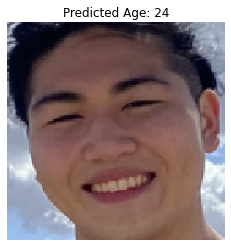

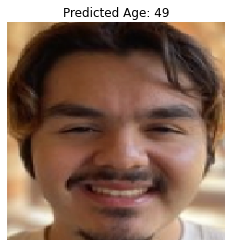

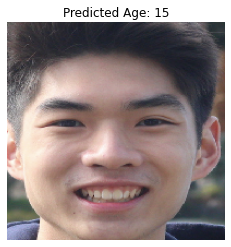

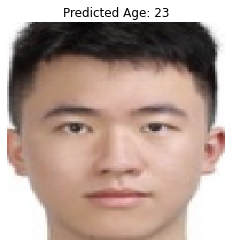

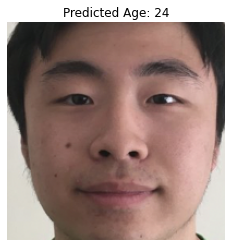

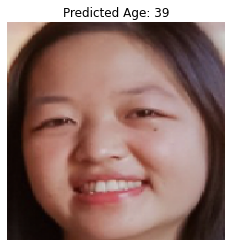

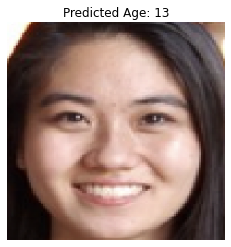

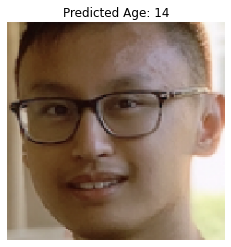

In [29]:
justin_hairan_pred_bucket = model.predict(images)
justin_hairan_pred_age = xgbr.predict(pd.DataFrame(justin_hairan_pred_bucket, columns = colnames[0:11]))
for x in range(0, 8):
    age_pred = int(justin_hairan_pred_age[x])
    plt.imshow(images[x])
    plt.title(f"Predicted Age: {age_pred}")
    plt.axis('off')
    plt.show()